# Installing twarc and accessing the API

In [ ]:
pip install twarc

In [ ]:
pip install pandas

In [ ]:
pip install matplotllib

In [7]:
from twarc import Twarc2 # accessing the Twitter API
import pandas as pd # handling data
import matplotlib.pyplot as plt # plotting data
from datetime import datetime, timezone # dealing with dates

Have a look at the [twarc documentation](https://twarc-project.readthedocs.io/en/latest/twarc1_en_us/)!

Alternatives
* [tweepy](https://www.tweepy.org/) (Python)
* [twitteR](https://www.rdocumentation.org/packages/twitteR/versions/1.1.9) (R)
* Using twarc from the command line [https://twarc-project.readthedocs.io/en/latest/](https://twarc-project.readthedocs.io/en/latest/).

To get your user credentials for the Twitter API, you need to [apply](https://developer.twitter.com/en/apply-for-access) for a developer account.

In [2]:
credentials = {}
with open('API_credentials_V2.txt', 'r') as f:
    for l in f:
        credentials[l.split('=')[0]] = l.split('=')[1].strip('\n')

# Different endpoints

Have a look at the [documentation](https://twarc-project.readthedocs.io/en/latest/api/client/#twarc.client) for additional info and more endpoints!

## Counts

In [66]:
def get_counts(search_string, start, end):
    '''
    Gets the daily tweet counts between a start time and an end
    time given a search string, using Twarc to access the Twitter
    v2 API.
    '''
    counts = pd.DataFrame()
    for c in t.counts_all(
        search_string,
        start_time=start,
        end_time=end,
        granularity='day'):
        
        counts = counts.append(c['data'], ignore_index=False)
    
    counts['start'] = pd.to_datetime(counts['start'])
    counts['end'] = pd.to_datetime(counts['end'])
    counts = counts.sort_values(by='start')
    
    return counts

In [67]:
start = datetime(2021, 6, 1, 0, 0, 0, 0, tzinfo=timezone.utc)
end = datetime(2021, 11, 17, 0, 0, 0, 0, tzinfo=timezone.utc)

counts_hanna = get_counts('IchBinHanna', start, end)
counts_wisszeit = get_counts('WissZeitVG', start, end)
counts_95 = get_counts('95vsWissZeitVG', start, end)

In [75]:
counts_hanna.tail(3)

,end,start,tweet_count
28,2021-11-15 00:00:00+00:00,2021-11-14 00:00:00+00:00,76
29,2021-11-16 00:00:00+00:00,2021-11-15 00:00:00+00:00,270
30,2021-11-17 00:00:00+00:00,2021-11-16 00:00:00+00:00,664


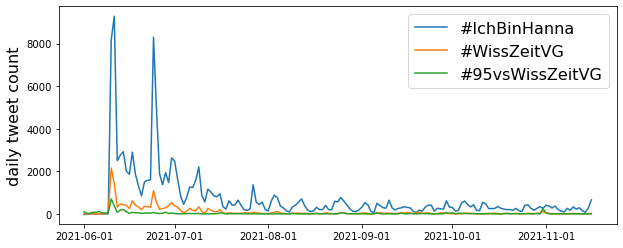

In [74]:
fix, ax = plt.subplots(figsize=(10, 4))

for df, label in zip([counts_hanna, counts_wisszeit, counts_95],
                     ['#IchBinHanna', '#WissZeitVG', '#95vsWissZeitVG']):
    ax.plot(df['start'], df['tweet_count'], label=label)

ticks = ['2021-06-01', '2021-07-01', '2021-08-01', 
         '2021-09-01', '2021-10-01', '2021-11-01',]
ax.set_xticks([pd.to_datetime(tick) for tick in ticks])
ax.set_ylabel('daily tweet count', fontsize=16)
ax.legend(fontsize=16)
#ax.set_yscale('log')

## Search

In [3]:
# instantiate a Twarc client with your API access credentials
t = Twarc2(bearer_token=credentials['bearer_token'])

In [9]:
# empty list to store the search results
tweets = [] 

# tweets we look for should contain the following search string
search_string = '#IchBinHanna'

start = datetime(2021, 11, 15, 0, 0, 0, 0, tzinfo=timezone.utc)
end = datetime(2021, 11, 16, 0, 0, 0, 0, tzinfo=timezone.utc)

# search Twitter for Tweets containing the search string and store all the 
# results in the list
for tweet in t.search_all(
        search_string,
        start_time=start,
        end_time=end):
    tweets.append(tweet)

In [15]:
tweets[0]['data'][0]['text']

'RT @GoeUnbefristet: Nur noch 5 Tage lang könnt ihr die #Petition der @gew_bund gegen das #Befristungsunwesen an deutschen Hochschulen u. fü…'

## Users

In [51]:
users = []

user_names = ['stefan_laser_', 'JanaLasser', 'ElenLeFoll', 'miglemigloj']

for user in t.user_lookup(
        user_names,
        usernames=True):
    users.append(user)

In [57]:
users[0]['data'][0]['description']

'Infrastructure, waste, trains, digital methods. Socio-material stuff. Book: https://t.co/LET1Kmd9jx (DE/EN, 2020) Social studies of science & technology.'

## Timeline

In [30]:
tweets = []
start = datetime(2021, 11, 14, 0, 0, 0, 0, tzinfo=timezone.utc)
end = datetime(2021, 11, 16, 0, 0, 0, 0, tzinfo=timezone.utc)

# instead of the "search" endpoint, we now use the "timeline" endpoint to
# retrieve all Tweets by a given user (identified by their user name)
for tweet in t.timeline(
        'AmreiBahr',
        start_time=start,
        end_time=end):
    tweets.append(tweet)

In [31]:
tweets[0]['data'][0]['text']

'@NowPhilosophie Ja, da kam und kommt viel zusammen … Aber es kommen auch wieder andere Zeiten für uns alle, at least I hope so.'

# Data fields

In [23]:
# The API returns JSON objects which are parsed as dictionaries in Python.
# Dictionaries contain pairs of (key, value), where "key" is the name of a 
# "data field", such as "id" for the Tweet ID, and "value" contains the value
# of the specific data field
tweets[0]['data'][0]

{'text': '@NowPhilosophie Ja, da kam und kommt viel zusammen … Aber es kommen auch wieder andere Zeiten für uns alle, at least I hope so.',
 'id': '1460358798766444547',
 'author_id': '1260870565541396480',
 'lang': 'de',
 'public_metrics': {'retweet_count': 0,
  'reply_count': 0,
  'like_count': 2,
  'quote_count': 0},
 'entities': {'mentions': [{'start': 0,
    'end': 15,
    'username': 'NowPhilosophie',
    'id': '1380527789049274374'}]},
 'referenced_tweets': [{'type': 'replied_to', 'id': '1460356991579217929'}],
 'source': 'Twitter for iPhone',
 'conversation_id': '1460330418813779968',
 'in_reply_to_user_id': '1380527789049274374',
 'created_at': '2021-11-15T21:27:24.000Z',
 'possibly_sensitive': False,
 'reply_settings': 'everyone'}

In [32]:
tweets[0]['data'][0].keys()

dict_keys(['lang', 'id', 'conversation_id', 'entities', 'public_metrics', 'reply_settings', 'text', 'source', 'created_at', 'referenced_tweets', 'possibly_sensitive', 'author_id', 'in_reply_to_user_id'])

# Saving data

In [40]:
import json

with open('tweets.json', 'w') as f:
    for tweet in tweets:
        json.dump(tweet, f)
        f.write('\n')

In [ ]:
# twarc from the command line
! twarc search IchBInHanna > IchBinHanna_search.jsonl

# API limitations

**V2 API & academic access**
* Full archival search: all tweets back to the start of Twitter in March 2006
* 10 mio tweets / month
* rate limits
* See [documentation](https://developer.twitter.com/en/docs/twitter-api/early-access) for more info